# The Fourier transform and sampling
## Definition of the Fourier transform
Let $\omega$ be a frequency variable in units \unit{}{\rad\per\second}. The fourier transform of the function $f(t)$ is given by
\begin{equation}
F(\omega) = \int_{-\infty}^\infty f(t)\mathrm{e}^{-i\omega t}dt,
\end{equation}
and the inverse transform is given by 
\begin{equation}
f(t) = \frac{1}{2\pi} \int_{-\infty}^\infty F(\omega) \mathrm{e}^{i\omega t} d\omega.
\end{equation}

## The Dirac delta function
The Dirac delta function $\delta(x)$ is not a proper function. It is a *distribution* defined by how it operates on functions. This definition is
\begin{equation}
<f, \delta> = \int_{-\infty}^\infty f(x)\delta(x) dx = f(0) 
\end{equation}
This means that for the constant signal $f(x) = 1$ 
\begin{equation}
<1, \delta> = \int_{-\infty}^\infty \delta(x) dx = 1.
\end{equation}
Visually, we view the $\delta(x)$ function as a peak, or impulse, at $x=0$. 

## The Fourier transform of a sinusoid is a delta function
Euler's formulae gives the $\cos$ and $\sin$ functions in terms of complex exponentials:

\begin{eqnarray}
\sin x &= \frac{1}{2i} \big( \mathrm{e}^{ix} - \mathrm{e}^{-ix} \big)\\
\cos x &= \frac{1}{2} \big( \mathrm{e}^{ix} + \mathrm{e}^{-ix} \big)
\end{eqnarray}

Since these functions are linear combinations of matrix exponentials, their Fourier transforms will be the same linear combination of the Fourier transform of the matrix exponential. Let $x=\omega_1 t$. We are interested in the Fourier transform of the complex function
\begin{equation}
f(t) = \mathrm{e}^{i\omega_1 t}
\end{equation}

From the definition of the transform we have (by just renaming one of the arguments)

\begin{eqnarray}
F(\hat{\omega}) &= \int_{-\infty}^\infty f(t)\mathrm{e}^{-i\hat{\omega} t}dt,\\
f(t) &=  \frac{1}{2\pi} \int_{-\infty}^\infty F(\omega) \mathrm{e}^{i\omega t} d\omega.
\end{eqnarray}

Combining the two expressions we get

\begin{eqnarray}
F(\hat{\omega}) &= \int_{-\infty}^\infty \frac{1}{2\pi} \int_{-\infty}^\infty F(\omega) \mathrm{e}^{i\omega t}d\omega \mathrm{e}^{-i\hat{\omega}t} dt \\
&= \int_{-\infty}^\infty F(\omega) \Big( \frac{1}{2\pi}  \int_{-\infty}^\infty \mathrm{e}^{i\omega t}  \mathrm{e}^{-i\hat{\omega}t} dt \Big) d\omega 
\end{eqnarray}

But this must mean that the paranthesis of the right hand side is the shifted delta function $\delta(\omega - \hat{\omega})$. So,
\begin{equation}
\frac{1}{2\pi}  \int_{-\infty}^\infty \mathrm{e}^{i\omega t}  \mathrm{e}^{-i\hat{\omega}t} dt = \delta (\omega-\hat{\omega})
\end{equation} 
or, by changing the variable names
\begin{equation}
\int_{-\infty}^\infty \mathrm{e}^{i\omega_1 t}  \mathrm{e}^{-i\omega t} dt = 2\pi \delta (\omega-\omega_1)
\end{equation}

For a sinusoid, $f(t) = \sin \omega_1 t$ we get
\begin{equation}
F(\omega) = \frac{1}{2i} 2\pi \delta(\omega-\omega_1) - \frac{1}{2i} 2\pi \delta(\omega + \omega_1)
 = -i\pi \delta(\omega-\omega_1) + i\pi \delta(\omega + \omega_1).
\end{equation}

**The Fourier transform (and hence the spectrum) of a sinusoid with frequency $\omega_1$ consists of two peaks: at $\pm \omega_1$. Both peaks has real part equal to zero. The peak at $\omega_1$ has negative imaginary part, whereas the peak at $-\omega_1$ has positive imaginary part.** This is illustrated below.

<IPython.core.display.Javascript object>


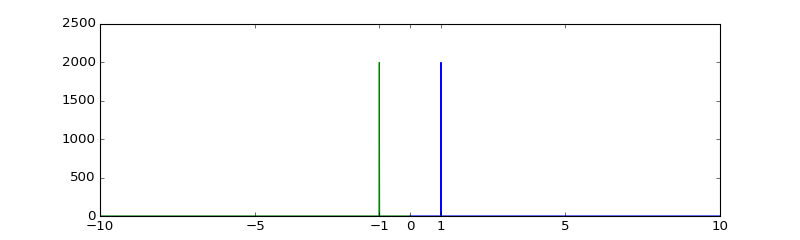

In [43]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

w1 = 1 # rad/s
M = 100 # Number of periods
ws = 40*w1 # Sampling frequency at 40 times the frequency of the sinusoid 
wN = ws/2.0 # The Nyquist frequency
h = 2*np.pi/ws
N = M*40
t = np.arange(N)*h

y = np.sin(w1*t)
Y = np.fft.fft(y) # Computes the Fourier transform
Ypos = Y[:N/2] # Positive part of the spectrum
Yneg = Y[N/2:] # Negative part. Obs: for frequencies wN up to ws
wpos = np.linspace(0, wN, N/2) # Positive frequencies, goes from 0 to wN
plt.figure(figsize=(10,3))
plt.plot(wpos, np.abs(Ypos))
plt.plot(-wpos[::-1], np.abs(Yneg))
plt.xlim((-10, 10))
plt.xticks((-10, -5, -1, 0, 1, 5, 10))
plt.xlabel(r'$\omega$  [rad/s]')

<IPython.core.display.Javascript object>


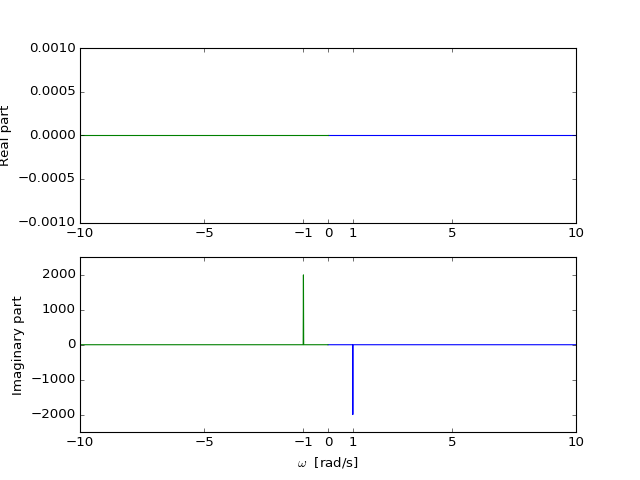

In [24]:
# Plot the real and imaginary parts
plt.figure()
plt.subplot(2,1,1)
plt.plot(wpos, np.real(Ypos))
plt.plot(-wpos[::-1], np.real(Yneg))
plt.xlim((-10, 10))
plt.ylim((-0.001, 0.001))
plt.ylabel('Real part')
plt.xticks((-10, -5, -1, 0, 1, 5, 10))
plt.subplot(2,1,2)
plt.plot(wpos, np.imag(Ypos))
plt.plot(-wpos[::-1], np.imag(Yneg))
plt.xlim((-10, 10))
plt.ylim((-2500, 2500))
plt.xticks((-10, -5, -1, 0, 1, 5, 10))
plt.ylabel('Imaginary part')
plt.xlabel(r'$\omega$  [rad/s]')

## The Fourier transform of a delta function is a constant
From the definition of the Fourier transform and of the delta function we get
\begin{equation}
\int_{-\infty}^\infty \delta(t) \mathrm{e}^{-i\omega t} dt = \mathrm{e}^{-i\omega \cdot 0} = 1
\end{equation}

## The inverse Fourier transform of a bandlimited flat spectrum
Consider instead the signal with Fourier transform 
\begin{equation}
F(\omega) = \begin{cases} 1, & -\omega_1 \le \omega \le \omega_1, \\0, & \text{otherwise} \end{cases}
\end{equation}
The function $F(\omega)$ is shown below

<IPython.core.display.Javascript object>


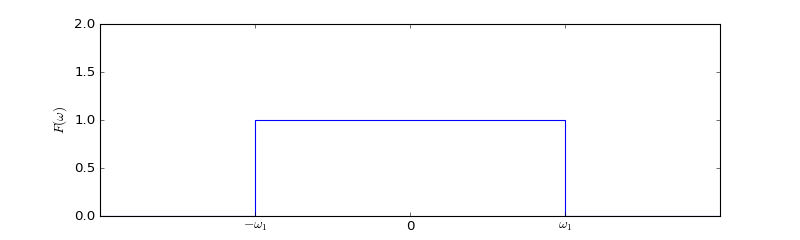

In [44]:
plt.figure(figsize=(10,3))
plt.plot([-10, -5, -5, 5, 5, 10], [0,0,1,1,0,0])
plt.ylim((0,2))
plt.xticks((-10, -5, 0, 5, 10))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$F(\omega)$')
lbls=plt.gca().set_xticklabels(['', r'$-\omega_1$', '0', r'$\omega_1$', ''])

Use the inverse Fourier transform to calculate the signal corresponding to the Fourier transform plotted above:
\begin{equation}
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) \mathrm{e}^{i\omega t} d\omega = \frac{1}{2\pi} \int_{-\omega_1}^{\omega_1} \mathrm{e}^{i\omega t} d\omega = \frac{1}{2\pi}\left[\frac{1}{it}\mathrm{e}^{i\omega t}\right]_{-\omega_1}^{\omega_1} = \frac{\omega_1}{\pi \omega_1t} \frac{1}{2i} \big(\mathrm{e}^{i\omega_1t} - \mathrm{e}^{-i\omega_1t} \big) = \frac{\omega_1}{\pi} \frac{\sin \omega_1 t}{\omega_1 t} = \frac{\omega_1}{\pi} \mathrm{sinc} \omega_1 t
\end{equation}
The result, the so-called sinc-function scaled by $\frac{\omega_1}{\pi}$ is plotted below for some different values of the bandwidth $\omega_1$.

<IPython.core.display.Javascript object>


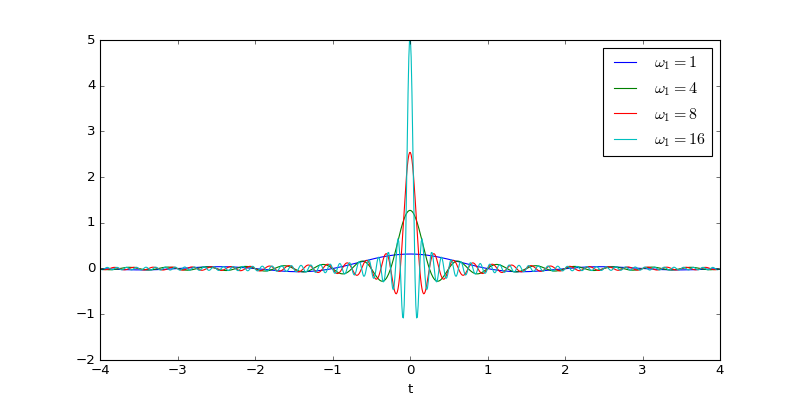

In [41]:
t = np.linspace(-4,4,800)
w1 = [1, 4, 8, 16]
plt.figure(figsize=(10,5))
for w in w1:
    plt.plot(t, w*np.sinc(w*t)/np.pi)
plt.ylim((-2, 5))
plt.legend([r'$\omega_1 = 1$', r'$\omega_1 = 4$', r'$\omega_1 = 8$',r'$\omega_1 = 16$'])

ttt=plt.xlabel('t')

**Note that as $\omega_1$ increases, the function resembles Dirac delta function, i.e. an impulse at $t=0$. **